# #ASSIGNMENT 2
Author: Mostafa Abdelazim
ID: 900203676

##Part 1

In [71]:
import numpy as np
import pandas as pd
import scipy
import scipy.stats
from scipy.stats import norm,t
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint
import matplotlib.pyplot as plt

In [72]:
df=pd.read_csv("results.csv")
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
43183,2/1/2022,Suriname,Guyana,2,1,Friendly,Paramaribo,Suriname,False
43184,2/2/2022,Burkina Faso,Senegal,1,3,African Cup of Nations,Yaoundé,Cameroon,True
43185,2/3/2022,Cameroon,Egypt,0,0,African Cup of Nations,Yaoundé,Cameroon,False
43186,2/5/2022,Cameroon,Burkina Faso,3,3,African Cup of Nations,Yaoundé,Cameroon,False


In [73]:
x=df['home_score']-df['away_score']
conditions = [
    (x<0),
    (x>0),
    (x==0)
    ]

In [74]:
values= ['win','lose','draw']

In [75]:
df['result'] = np.select(conditions, values)

In [76]:
x=df['result'].value_counts()

In [77]:
x=np.array(x)

In [78]:
x

array([21009, 12224,  9955], dtype=int64)

In [79]:
conditions = [
    (df['tournament']=='Friendly'),
    (df['tournament']!='Friendly')
    ]

In [80]:
values=['Friendly','Official']

In [81]:
df['typematch'] = np.select(conditions, values)

In [82]:
x=pd.crosstab(df['typematch'],df['result'],margins=True)
x

result,draw,lose,win,All
typematch,,,,
Friendly,4329,8141,4806,17276
Official,5626,12868,7418,25912
All,9955,21009,12224,43188


In [83]:
x=np.array(x)
x

array([[ 4329,  8141,  4806, 17276],
       [ 5626, 12868,  7418, 25912],
       [ 9955, 21009, 12224, 43188]], dtype=int64)

##Part 2

In [84]:
df1=pd.read_csv('covid_data.csv',encoding='latin-1')
df1

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month
0,2020-02-24,AFG,Afghanistan,Low income,South Asia,Asia,5,0,38041754,Mon,Feb
1,2020-02-25,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Tue,Feb
2,2020-02-26,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Wed,Feb
3,2020-02-27,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Thu,Feb
4,2020-02-28,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Fri,Feb
...,...,...,...,...,...,...,...,...,...,...,...
122838,2021-12-27,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,1098,17,14645468,Mon,Dec
122839,2021-12-28,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,2099,32,14645468,Tue,Dec
122840,2021-12-29,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,0,0,14645468,Wed,Dec
122841,2021-12-30,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,4180,57,14645468,Thu,Dec


In [85]:
ratio=df1['dcases']/df1['ddeaths']
df1['ratio']=ratio

In [86]:
df1

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month,ratio
0,2020-02-24,AFG,Afghanistan,Low income,South Asia,Asia,5,0,38041754,Mon,Feb,inf
1,2020-02-25,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Tue,Feb,NaN
2,2020-02-26,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Wed,Feb,NaN
3,2020-02-27,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Thu,Feb,NaN
4,2020-02-28,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Fri,Feb,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
122838,2021-12-27,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,1098,17,14645468,Mon,Dec,64.588235
122839,2021-12-28,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,2099,32,14645468,Tue,Dec,65.593750
122840,2021-12-29,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,0,0,14645468,Wed,Dec,NaN
122841,2021-12-30,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,4180,57,14645468,Thu,Dec,73.333333


In [87]:
df1.replace([np.inf, -np.inf], np.nan, inplace=True)
df1.dropna(inplace=True)
df1

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month,ratio
28,2020-03-23,AFG,Afghanistan,Low income,South Asia,Asia,6,1,38041754,Mon,Mar,6.000000
31,2020-03-26,AFG,Afghanistan,Low income,South Asia,Asia,6,1,38041754,Thu,Mar,6.000000
34,2020-03-29,AFG,Afghanistan,Low income,South Asia,Asia,8,2,38041754,Sun,Mar,4.000000
39,2020-04-03,AFG,Afghanistan,Low income,South Asia,Asia,34,1,38041754,Fri,Apr,34.000000
41,2020-04-05,AFG,Afghanistan,Low income,South Asia,Asia,29,2,38041754,Sun,Apr,14.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
122837,2021-12-26,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,605,6,14645468,Sun,Dec,100.833333
122838,2021-12-27,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,1098,17,14645468,Mon,Dec,64.588235
122839,2021-12-28,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,2099,32,14645468,Tue,Dec,65.593750
122841,2021-12-30,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,4180,57,14645468,Thu,Dec,73.333333


In [88]:
conti=df1.groupby("continent").agg({"ratio": [np.mean, np.std, np.size]})
conti

ratio                   
                                mean         std   size
continent                                              
Africa                     66.834960  169.287060  13341
Asia                      119.030536  182.359509  19418
Europe                    131.505190  413.824599  20353
North America(continent)   75.136616  112.808281   7530
Oceania                   147.137103  315.290208    551
South America(continent)   55.021539   80.371449   6580

In [89]:
conti.index

Index(['Africa', 'Asia', 'Europe', 'North America(continent)', 'Oceania',
       'South America(continent)'],
      dtype='object', name='continent')

In [90]:
ci95_hi = []
ci95_lo = []

In [91]:
for i in conti.index:
    m, s, n = conti.loc[i]
    x=scipy.stats.t.interval(.95, n-1, m,s/np.sqrt(n-1))
    ci95_hi.append(x[1])
    ci95_lo.append(x[0])

In [92]:
ci95_hi

[69.70794503267405,
 121.59568416810691,
 137.19092539924134,
 77.68514859693536,
 173.54500972008594,
 56.96398912019325]

In [93]:
ci95_lo

[63.96197520097025,
 116.46538717490557,
 125.81945378135435,
 72.58808276426126,
 120.7291957123713,
 53.07908907971161]

In [94]:
conti['ci95_hi'] = ci95_hi
conti['ci95_lo'] = ci95_lo
print(conti)

                               ratio                        ci95_hi  \
                                mean         std   size               
continent                                                             
Africa                     66.834960  169.287060  13341   69.707945   
Asia                      119.030536  182.359509  19418  121.595684   
Europe                    131.505190  413.824599  20353  137.190925   
North America(continent)   75.136616  112.808281   7530   77.685149   
Oceania                   147.137103  315.290208    551  173.545010   
South America(continent)   55.021539   80.371449   6580   56.963989   

                             ci95_lo  
                                      
continent                             
Africa                     63.961975  
Asia                      116.465387  
Europe                    125.819454  
North America(continent)   72.588083  
Oceania                   120.729196  
South America(continent)   53.079089  


In [95]:
df_ci= pd.DataFrame(conti)

In [96]:
df_ci

ratio                        ci95_hi  \
                                mean         std   size               
continent                                                             
Africa                     66.834960  169.287060  13341   69.707945   
Asia                      119.030536  182.359509  19418  121.595684   
Europe                    131.505190  413.824599  20353  137.190925   
North America(continent)   75.136616  112.808281   7530   77.685149   
Oceania                   147.137103  315.290208    551  173.545010   
South America(continent)   55.021539   80.371449   6580   56.963989   

                             ci95_lo  
                                      
continent                             
Africa                     63.961975  
Asia                      116.465387  
Europe                    125.819454  
North America(continent)   72.588083  
Oceania                   120.729196  
South America(continent)   53.079089

In [97]:
df_ci.index
df_ci['continent']=df_ci.index

In [98]:
df_ci

ratio                        ci95_hi  \
                                mean         std   size               
continent                                                             
Africa                     66.834960  169.287060  13341   69.707945   
Asia                      119.030536  182.359509  19418  121.595684   
Europe                    131.505190  413.824599  20353  137.190925   
North America(continent)   75.136616  112.808281   7530   77.685149   
Oceania                   147.137103  315.290208    551  173.545010   
South America(continent)   55.021539   80.371449   6580   56.963989   

                             ci95_lo                 continent  
                                                                
continent                                                       
Africa                     63.961975                    Africa  
Asia                      116.465387                      Asia  
Europe                    125.819454                    Europe  
North America(continent)   72.588083  North America(continent)  
Oceania                   120.729196                   Oceania  
South America(continent)   53.079089  South America(continent)

In [99]:
df_ci.columns

MultiIndex([(    'ratio', 'mean'),
            (    'ratio',  'std'),
            (    'ratio', 'size'),
            (  'ci95_hi',     ''),
            (  'ci95_lo',     ''),
            ('continent',     '')],
           )

([<matplotlib.axis.YTick at 0x2aba953ddc0>,
 [Text(0, 0, 'Africa'),
  Text(0, 1, 'Asia'),
  Text(0, 2, 'Europe'),
  Text(0, 3, 'North America(continent)'),
  Text(0, 4, 'Oceania'),
  Text(0, 5, 'South America(continent)')])

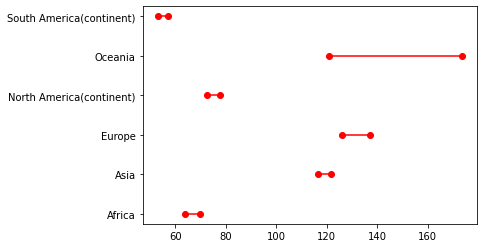

In [100]:
for lb,ub,y in zip(df_ci['ci95_lo'],df_ci['ci95_hi'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['continent']))

In [101]:
reg=df1.groupby("region").agg({"ratio": [np.mean, np.std, np.size]})
reg

ratio                   
                                  mean         std   size
region                                                   
East Asia & Pacific         134.880234  239.366696   5632
Europe & Central Asia       126.027083  385.542862  23935
Latin America & Caribbean    62.187213   95.695498  12785
Middle East & North Africa  114.811960  173.499843  10205
North America(region)       100.193903  125.714933   1325
South Asia                   77.891681   86.014500   3536
Sub-Saharan Africa           71.211305  186.961023  10355

In [102]:
reg.index
ci95_hi1 = []
ci95_lo1 = []

In [103]:
for i in reg.index:
    m, s, n = reg.loc[i]
    x=scipy.stats.t.interval(.95, n-1, m,s/np.sqrt(n-1))
    ci95_hi1.append(x[1])
    ci95_lo1.append(x[0])

In [104]:
reg['ci95_hi'] = ci95_hi1
reg['ci95_lo'] = ci95_lo1
print(reg)

                                 ratio                        ci95_hi  \
                                  mean         std   size               
region                                                                  
East Asia & Pacific         134.880234  239.366696   5632  141.133580   
Europe & Central Asia       126.027083  385.542862  23935  130.911751   
Latin America & Caribbean    62.187213   95.695498  12785   63.846217   
Middle East & North Africa  114.811960  173.499843  10205  118.178731   
North America(region)       100.193903  125.714933   1325  106.971694   
South Asia                   77.891681   86.014500   3536   80.728122   
Sub-Saharan Africa           71.211305  186.961023  10355   74.812908   

                               ci95_lo  
                                        
region                                  
East Asia & Pacific         128.626889  
Europe & Central Asia       121.142415  
Latin America & Caribbean    60.528210  
Middle East & North Afr

In [106]:
df_ci1= pd.DataFrame(reg)
df_ci1.index
df_ci1['region']=df_ci1.index

In [107]:
df_ci1

ratio                        ci95_hi  \
                                  mean         std   size               
region                                                                  
East Asia & Pacific         134.880234  239.366696   5632  141.133580   
Europe & Central Asia       126.027083  385.542862  23935  130.911751   
Latin America & Caribbean    62.187213   95.695498  12785   63.846217   
Middle East & North Africa  114.811960  173.499843  10205  118.178731   
North America(region)       100.193903  125.714933   1325  106.971694   
South Asia                   77.891681   86.014500   3536   80.728122   
Sub-Saharan Africa           71.211305  186.961023  10355   74.812908   

                               ci95_lo                      region  
                                                                    
region                                                              
East Asia & Pacific         128.626889         East Asia & Pacific  
Europe & Central Asia       121.142415       Europe & Central Asia  
Latin America & Caribbean    60.528210   Latin America & Caribbean  
Middle East & North Africa  111.445190  Middle East & North Africa  
North America(region)        93.416112       North America(region)  
South Asia                   75.055240                  South Asia  
Sub-Saharan Africa           67.609702          Sub-Saharan Africa

In [108]:
df_ci1.columns

MultiIndex([(  'ratio', 'mean'),
            (  'ratio',  'std'),
            (  'ratio', 'size'),
            ('ci95_hi',     ''),
            ('ci95_lo',     ''),
            ( 'region',     '')],
           )

([<matplotlib.axis.YTick at 0x2aba9ecceb0>,
 [Text(0, 0, 'East Asia & Pacific'),
  Text(0, 1, 'Europe & Central Asia'),
  Text(0, 2, 'Latin America & Caribbean'),
  Text(0, 3, 'Middle East & North Africa'),
  Text(0, 4, 'North America(region)'),
  Text(0, 5, 'South Asia'),
  Text(0, 6, 'Sub-Saharan Africa')])

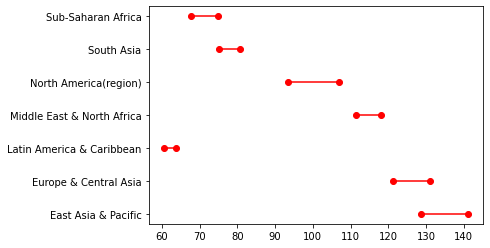

In [109]:
for lb,ub,y in zip(df_ci1['ci95_lo'],df_ci1['ci95_hi'],range(len(df_ci1))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci1)),list(df_ci1['region']))